In [1]:
import tensorflow as tf
import numpy as np

from mrl import *
from A3Ccustom import *

from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

/Users/abeukers/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
np.random.choice([0,1])

0

In [112]:
nepisodes = 15000
for i in range(1):
  R = []
  net = Network()
  for i in range(nepisodes):
    if i%(nepisodes/100)==0:
      print(i/nepisodes)
    ep_buf = net.unroll_episode()
    l,r = net.update(ep_buf)
    L.append(l)
    R.append(r)
  plt.plot(R)

0.0
0.01
0.02
0.03
0.04
0.05


KeyboardInterrupt: 

In [ ]:
Rt = []
net = Network()
for i in range(1000):
  ep_buf = net.unroll_episode()
  r = ep_buf[:,2]
  Rt.append(r)
plt.plot(np.mean(Rt,0))

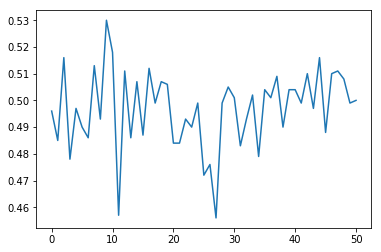

In [82]:
arr=np.array([1])
np.expand_dims(arr,0)

array([[1]])

In [63]:
net.unroll_episode()

array([[1, 1, 0, array([[[0.06834294]]], dtype=float32)],
       [2, 1, 0, array([[[0.05076426]]], dtype=float32)],
       [3, 0, 1, array([[[0.11064148]]], dtype=float32)],
       [4, 0, 1, array([[[0.2670538]]], dtype=float32)],
       [5, 1, 0, array([[[0.33280528]]], dtype=float32)],
       [6, 0, 0, array([[[0.30625525]]], dtype=float32)],
       [7, 1, 1, array([[[0.42872685]]], dtype=float32)],
       [8, 1, 0, array([[[0.4544489]]], dtype=float32)],
       [9, 0, 1, array([[[0.48075223]]], dtype=float32)],
       [10, 0, 1, array([[[0.6211521]]], dtype=float32)],
       [11, 0, 1, array([[[0.6673622]]], dtype=float32)],
       [12, 0, 1, array([[[0.70976305]]], dtype=float32)],
       [13, 0, 1, array([[[0.74858147]]], dtype=float32)],
       [14, 0, 1, array([[[0.7821188]]], dtype=float32)],
       [15, 0, 1, array([[[0.80890995]]], dtype=float32)],
       [16, 0, 1, array([[[0.82577056]]], dtype=float32)],
       [17, 1, 0, array([[[0.8363245]]], dtype=float32)],
       [18, 

In [29]:
st = 0
while st<10:
  st+=1
  print(st)

1
2
3
4
5
6
7
8
9
10


In [27]:
mygraph = tf.Graph()
mysess = tf.Session(graph=mygraph)
stsize=5
batchsize=1

with mygraph.as_default():
  X = np.random.random([1,3,stsize])
  # keras LSTM layer
  xph = tf.placeholder(shape=[batchsize,None,stsize],dtype=tf.float32)
  lstm_cell_keras = tf.keras.layers.LSTMCell(stsize)
  rnn_layer = tf.keras.layers.RNN(lstm_cell_keras,return_sequences=True,return_state=True,stateful=True)
  run_output,final_out,final_state = rnn_layer(xph)
  mysess.run(tf.global_variables_initializer())
  st_o = mysess.run([final_state],{xph:X})
  print(st_o)
  rnn_layer.reset_states(states=np.ones([1,stsize]))
  print(1)
  st_o = mysess.run([final_state],{xph:X})
  print(st_o)
  
  st_o = mysess.run([final_state],{xph:X})
  print(st_o)


[array([[-0.01211821,  0.2820319 , -0.01057701, -0.41766134, -0.06441022]],
      dtype=float32)]


TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("Placeholder_1:0", shape=(1, 5), dtype=float32) is not an element of this graph.

In [11]:

with mygraph.as_default():
  # keras LSTM layer
  xph_keras = tf.placeholder(shape=[None,None,stsize],dtype=tf.float32)
  lstm_cell_keras = tf.keras.layers.LSTMCell(stsize)
  rnn_layer = tf.keras.layers.RNN(lstm_cell_keras,return_sequences=True,return_state=True)
  keras_out,(*states) = rnn_layer(xph_keras)
  # dynamic rnn
  xph = tf.placeholder(shape=[None,None,stsize],dtype=tf.float32)
  lstm_cell = tf.nn.rnn_cell.BasicRNNCell(stsize)
  out,state = tf.nn.dynamic_rnn(lstm_cell,xph,initial_state=lstm_cell.zero_state(batchsize,tf.float32))  

  mysess.run(tf.global_variables_initializer())

In [12]:

mysess.run(keras_out,feed_dict={xph_keras:np.random.random([batchsize,10,stsize])})

array([[[ 0.00210754,  0.12611032,  0.09389933, -0.00711881,
         -0.01064078],
        [-0.02065051,  0.17666382,  0.1625301 , -0.05803992,
         -0.01846159],
        [-0.11080689,  0.21999912,  0.22154991,  0.00885517,
         -0.05098841],
        [-0.11254236,  0.19785248,  0.24539696,  0.01266541,
         -0.06282832],
        [-0.0795598 ,  0.20415209,  0.21949556, -0.02049344,
         -0.06458029],
        [-0.02711281,  0.2495243 ,  0.16110204,  0.02659542,
         -0.12971781],
        [ 0.00469919,  0.22644596,  0.17530894, -0.07546748,
         -0.12297752],
        [ 0.04325646,  0.25930157,  0.10211553, -0.03153237,
         -0.1467776 ],
        [ 0.03105882,  0.28054997,  0.09128726, -0.07345729,
         -0.11981783],
        [-0.03790435,  0.259521  ,  0.14301223, -0.08083966,
         -0.08796997]]], dtype=float32)

In [7]:
acnet = ACNetwork(num_actions=2,scope='global',trainer=None)

In [180]:
acnet.lstm_cell.zero_state(0)

TypeError: zero_state() missing 2 required positional arguments: 'batch_size' and 'dtype'

In [ ]:
acnet.lstm_cell.

In [139]:
mygraph = tf.Graph()

In [141]:
mygraph.get_all_collection_keys()

[]

In [ ]:
gamma = .8 # discount rate for advantage estimation and reward discounting
a_size = 2 # Agent can move Left, Right, or Fire
load_model = True
train = False
model_path = './model_meta'

tf.reset_default_graph()

if not os.path.exists(model_path):
    os.makedirs(model_path)
    
if not os.path.exists('./frames'):
    os.makedirs('./frames')

    
with tf.device("/cpu:0"): 
  global_episodes = tf.Variable(0,dtype=tf.int32,name='global_episodes',trainable=False)
  trainer = tf.train.AdamOptimizer(learning_rate=1e-3)
  master_network = AC_Network(a_size,'global',None) # Generate global network
  #num_workers = multiprocessing.cpu_count() # Set workers ot number of available CPU threads
  num_workers = 1
  workers = []
  # Create worker classes
  for i in range(num_workers):
    worker = Worker(dependent_bandit('uniform'),i,a_size,trainer,model_path,global_episodes)
    workers.append(worker)
  saver = tf.train.Saver(max_to_keep=5)

with tf.Session() as sess:
  coord = tf.train.Coordinator()
  if load_model == True:
    print('Loading Model...')
    ckpt = tf.train.get_checkpoint_state(model_path)
    saver.restore(sess,ckpt.model_checkpoint_path)
  else:
    sess.run(tf.global_variables_initializer())
      
  worker_threads = []
  for worker in workers:
    worker_work = lambda: worker.work(gamma,sess,coord,saver,train)
    thread = threading.Thread(target=(worker_work))
    thread.start()
    worker_threads.append(thread)
  coord.join(worker_threads)




# MRL simplest version

In [5]:
from mrl import *